# Unsupervised Machine Learning

Guillermo Cabrera

guillecabrera@udec.cl

### A Machine Learning Problem:

• Point sources ... what are they?

• Selection of SDSS point sources.
http://astrostatistics.psu.edu/MSMA/datasets/

• Get their colors.

• How many different kind of objects can we distinguish?

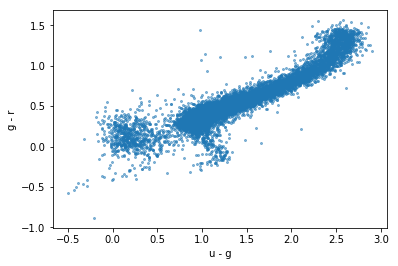

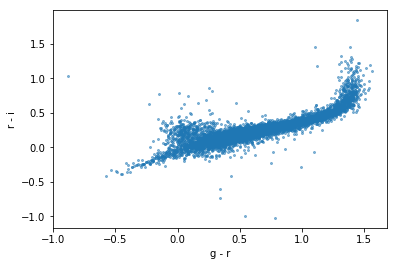

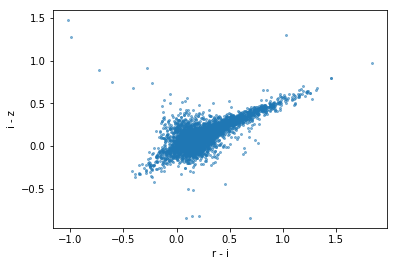

In [1]:
%matplotlib inline

import sys
import numpy as np
import pylab as pl
import pandas as pd

df = pd.read_csv("data/SDSS_colors.csv")

u, g, r, i, z = df["u_mag"], df["g_mag"], df["r_mag"], df["i_mag"], df["z_mag"]
colors = u - g, g - r, r - i, i - z
names = np.array(["u - g", "g - r", "r - i", "i - z"])
for i in range (len(colors) - 1):
    pl.clf()
    pl.plot (colors[i], colors[i+1], "o", markersize=2, alpha = 0.5)
    pl.xlabel (names[i])
    pl.ylabel (names[i+1])
    pl.show()
    


**Two Approaches:**
    
Do we have some already labeled data?
* **Yes**: Supervised Learning
* * ANN, SVM, Decision Trees, Bayesian Classifiers, Nearest Neighbours, etc...
* **No**: Unsupervised Learning
* * Clustering: K-Means, Hierarchical Clustering, DBSCAN, etc...
* * Density Estimation: Histograms, Kernel Density Estimation, Gaussian Mixture Models

## Unsupervised Machine Learning

The problem of unsupervised machine learning is to find structure in un-labeled data.

* Clustering (partitioning / hierarchical)
* * k-means
* * DBSCAN
* Density Estimation
* * Histograms
* * Kernel Density Estimation
* * Gaussian Mixture Models 

## Clustering

Find sets of objects such that objects inside each set are similar to each other (or related), and are different (or not related) to objects from other groups. 

<img src = "images/Clustering1.png" /> <img src = "images/Clustering2.png" />

* Partitioning Clustering

<img src = "images/PartitionClustering.png" />

* Hierarchical Clustering

<img src = "images/HierarchicalClustering.png" />



       u_mag      g_mag      r_mag      i_mag      z_mag
0  20.533161  17.968030  16.827314  16.373095  16.091063
1  18.894476  17.674576  17.208895  17.033516  16.972940
2  18.290901  17.022612  16.625498  16.431305  16.399673
3  19.784182  17.820679  17.003235  16.721306  16.541569
4  18.874607  17.638632  17.120625  16.907972  16.849592


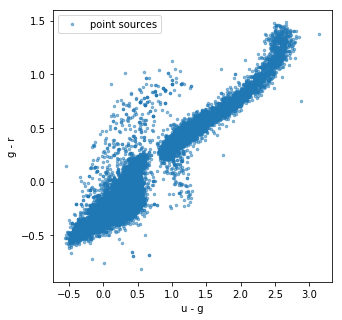

In [2]:
%matplotlib inline

import sys
import numpy as np
import pylab as pl
import pandas as pd

df = pd.read_csv("data/SDSS_PS_Unsup.csv")
print df.head()
colors = np.array([df["u_mag"] - df["g_mag"], df["g_mag"] - df["r_mag"]])

def Plot2DMags (colors):
    pl.plot (colors[0], colors[1], ".", markersize=5, label = "point sources", alpha = 0.5)

    pl.xlabel ('u - g')
    pl.ylabel ('g - r')
    pl.legend (loc = "upper left")


pl.clf()
pl.figure(figsize = (5, 5))
Plot2DMags (colors)
pl.show()
pl.close()


### K-means

* Divide objects into k clusters.
* Each cluster is described by a centroid.
* Each object is associated to the closest centroid. 

<img src = images/Kmeans0.png />

How do we define the centroids?

BASIC ALGORITHM:

* Choose initial centroids
* * randomly
* * clusters depend on the initial centroids
* Randomly pick a new object and associate it to the closest centroid.
* Centroids are re-defined as the mean of the objects in the cluster.
* Convergence is achieved after l iterations (when clusters dont change much).

<img src = images/Kmeans1.png /><img src = images/Kmeans2.png /><img src = images/Kmeans3.png /><img src = images/Kmeans4.png /><img src = images/Kmeans0.png />

#### Initialization Options

* Random Positions
* Random data points as Centers
* Random Cluster assignment to data points

* Start several times

#### K-means
* Guaranteed to converge
* Result depends on initialization
* Number of clusters is important
* Sensitive to outliers
  * Use median instead of mean for updates

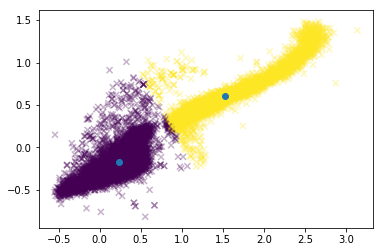

In [9]:
from sklearn import cluster

km = cluster.KMeans(n_clusters=2)
#km = cluster.KMeans(n_clusters=2, init = np.array([[-0.5, -0.5], [2.5, 1.5]]))
#km = cluster.KMeans(n_clusters=2, init = np.array([[-0.5, -0.5], [-0.5, -0.5]]))
#km = cluster.KMeans(n_clusters=3, init = np.array([[-0.5, -0.5], [2.5, 1.5], [0.5, 1.0]]))

km.fit(colors.transpose())

labels = km.labels_

pl.clf()
pl.scatter(colors[0], colors[1], c=labels.astype(np.float), marker = "x", alpha = 0.3)
pl.plot (km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], "o")
pl.show()


### Mean Shift

Having to specify k is annoying.

* Put a window around each point
* Compute mean of points in the frame.
* Shift the window to the mean
* Repeat until convergence

The GOOD:
* Does not need to know number of clusters
* Can handle arbitrary shaped clusters
* Robust to initialization

The BAD:
* Needs bandwidth parameter (window size)
* Computationally expensive

How does scikit-learn estimates the window size?
* Randomly select $n$ data points.
* Find its $k$ nearest neighbors.
* The window size is calculated as the mean of the most distant neighbor for each of the $n$ sampled data point.

In [23]:
# The following bandwidth can be automatically detected using
bandwidth = cluster.estimate_bandwidth(colors.transpose(), 
                                       quantile=0.3, n_samples=500)
print bandwidth

0.534086581724


[0 1]


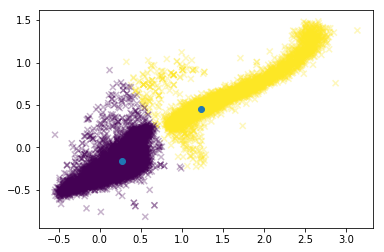

In [24]:
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(colors.transpose())

labels = ms.labels_
print np.unique(labels)

pl.clf()
pl.scatter(colors[0], colors[1], c=labels.astype(np.float), marker = "x", alpha = 0.3)
pl.plot (ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], "o")
pl.show()


### Agglomerative Hierarchical Clustering

**Agglomerative**: At each iteration merge the closest pair of clusters.

Need to define "proximity".

<img src=images/Agglom_prox.png />

**Algorithm**

* Compute the proximity matrix.
* **repeat**
* * Merge the closest two clusters.
* * Update the proximity matrix to reflect the proximity between the new cluster and the original clusters.
* **until** Only one cluster remains.


<img src=images/Agglom1.png />

**proximity matrix** <img src=images/Agglom_table.png />

<img src=images/Agglom2.png />
___
<img src=images/Agglom3.png />
___
<img src=images/Agglom4.png />
___
<img src=images/Agglom5.png />
___
<img src=images/Agglom6.png />

**Dendogram**
<img src=images/Agglom_dendogram.png/>


(2, 1000)
[0 1]


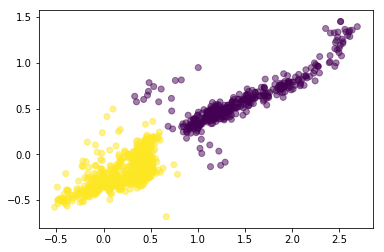

In [28]:
from sklearn.cluster import AgglomerativeClustering

random_batch = np.random.randint(colors.shape[1], size = 1000)
colors_sm = colors[:, random_batch]
print colors_sm.shape

agglom = AgglomerativeClustering (n_clusters = 2)

agglom.fit(colors_sm.transpose())

labels = agglom.labels_
print np.unique(labels)
pl.clf()
pl.scatter(colors_sm[0], colors_sm[1], c=labels.astype(np.float), marker = "o", alpha = 0.5)
pl.show()

### DBSCAN

* Center-Based Density: number of points within a specified readius Eps.
* Classification of points according to this density:
* **Core point (CP)**: at least MinPts within an Eps radius.
* **Border point (BP)**: not a CP but in the neighborhood of a CP.
* **Noise point (NS)**: neither of the above.

<img src=images/DBSCAN.png />

[-1  0  1]
[422, 4918, 8920]


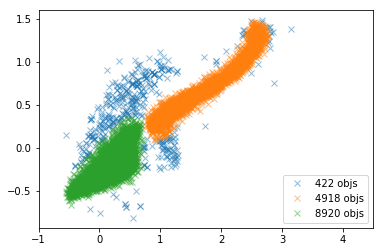

In [49]:

#dbscan = cluster.DBSCAN(eps=0.05, min_samples = 20)
dbscan = cluster.DBSCAN(eps=.1, min_samples = 100)

dbscan.fit(colors.transpose())

labels = dbscan.labels_
unique_labs = np.unique(labels)
print unique_labs
count = [(labels == lab).sum() for lab in unique_labs]
print count

pl.clf()
for i in range(len(unique_labs)):
    lab = unique_labs[i]
    pl.plot(colors[0][labels == lab], colors[1][labels == lab], "x", alpha = 0.5, label = str(count[i]) + " objs")
pl.xlim([-1, 4.5])
pl.legend(loc = "best")
pl.show()


How can we define eps and mins_samples?

- Plot points sorted by distance to k NN vs the k NN distance
- Sharp change for noise. 

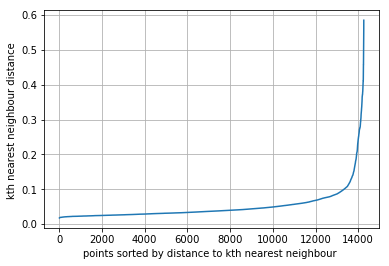

In [48]:
from sklearn.neighbors import NearestNeighbors

K_neigh = 100
radius = 4
neigh = NearestNeighbors(K_neigh, radius)
neigh.fit(colors.transpose())

dist, _ = neigh.kneighbors(colors.transpose())
larger_dist = dist[:, -1]
larger_dist.sort()

pl.clf()
pl.plot (larger_dist)
pl.xlabel("points sorted by distance to kth nearest neighbour ")
pl.ylabel("kth nearest neighbour distance ")
pl.grid(True)
pl.show()


### Comparing Cluster Algorithms

<img src=images/ClusterComparison.png style="width: 500px;"/>

### Evaluating Clusters

Different cluster evaluation techniques exist:
* Cohesion (mean distance to objects within its cluster):

  SSE$_i =\sum_{\mathbf{x}\in C_i}\mathrm{dist}(\boldsymbol{c}_i, \boldsymbol{x})^2=\frac{1}{2N_i}\sum_{\mathbf{x}\in C_i}\sum_{\mathbf{y}\in C_i}\mathrm{dist}(\boldsymbol{x}, \boldsymbol{y})^2$

* Separation (minimum mean distance to objects within other clusters)
  
  SSB$= \sum_{i=1}^KN_i\mathrm{dist}(\boldsymbol{c}_i, \boldsymbol{c})^2= \frac{1}{2K}\sum_{i=1}^K\sum_{j=1}^KN_i\mathrm{dist}(\boldsymbol{c}_i, \boldsymbol{c}_j)^2$
  
* _Silhuette_
* Similarity Matrix


#### Silhouette Coefficient

The Silhouette coefficient is used when no labeled data is available. It takes into account cohesion and separation.

* $a$: mean distance to objects within its cluster (cohesion).
* $b$: minimum mean distance to objects within other clusters (separation).
* $s = \frac{b - a}{\max (a, b)}$

We want $s$ to be possitive ($a < b$) and close to 1 (small $a$). 

#### Similarity Matrix

<img src=images/SimilarityMatrix.png style="width: 600px;">

### Determining the correct number of clusters

n =  2 , silhouette =  0.656355985451


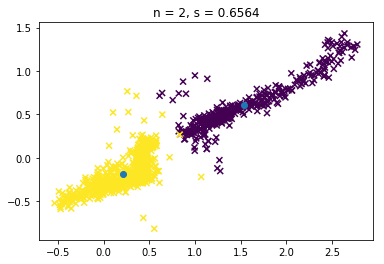

n =  3 , silhouette =  0.640971724035


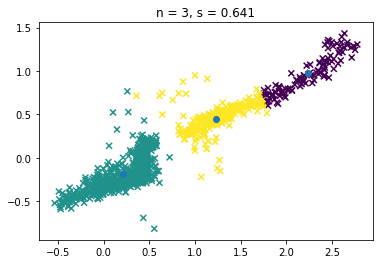

n =  4 , silhouette =  0.558408870123


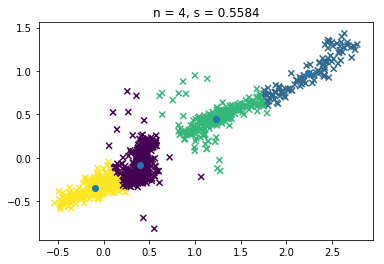

n =  10 , silhouette =  0.436106331387


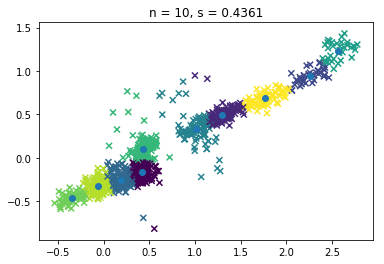

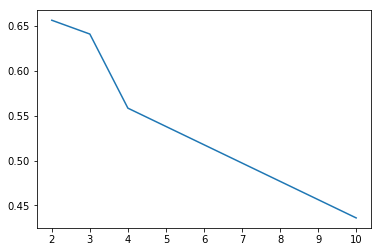

In [50]:
from sklearn import cluster
from sklearn import metrics

N_small = 1000
#np.random.shuffle(np.array(colors).transpose())
colors_sm = colors[:, np.random.choice (np.arange(colors.shape[1]), N_small)][:, :N_small]

ns = [2, 3, 4, 10]
ss = []
for n in ns:
    km = cluster.KMeans(n_clusters=n)
    km.fit(np.array(colors_sm).transpose())

    labels = km.labels_
    ss.append (metrics.silhouette_score(np.array(colors_sm).transpose(), labels))
    print "n = ", n, ", silhouette = ", ss[-1]
    
    pl.clf()
    pl.scatter(colors_sm[0], colors_sm[1], c=labels.astype(np.float), marker = "x")
    pl.plot (km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], "o")
    pl.title ("n = " + str(n) + ", s = " + str(np.round(ss[-1], 4)))
    pl.show()

pl.plot ()
pl.plot (ns, ss)
pl.show()

## Example: Color Quantization

Idea taken from [sklearn](http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html).

427 640 3


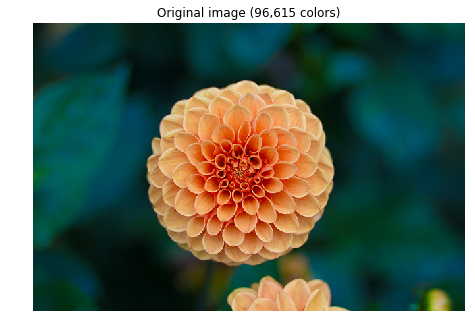

In [71]:
from sklearn.datasets import load_sample_image

image = load_sample_image("flower.jpg")#[160:170, 185:195]

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(image.shape)
print w, h, d

# Display all results, alongside original image
pl.figure(1)
pl.clf()
ax = pl.axes([0, 0, 1, 1])
pl.axis('off')
pl.title('Original image (96,615 colors)')
pl.imshow(image)

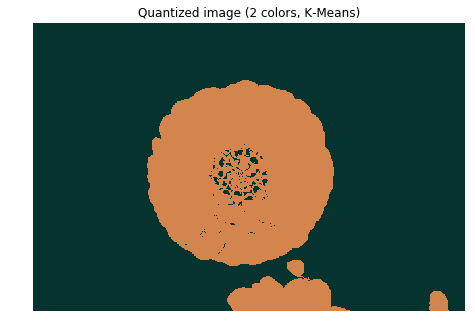

In [72]:
image_array = np.reshape(image, (w * h, d))
n_colors = 2
km = cluster.KMeans(n_clusters=n_colors, random_state=0)

from sklearn.utils import shuffle
image_array_sample = shuffle(image_array, random_state=0)[:1000]
km.fit(image_array_sample)

labels = km.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

#print km.cluster_centers_
pl.clf()
ax = pl.axes([0, 0, 1, 1])
pl.axis('off')
pl.title('Quantized image (' + str(n_colors) + ' colors, K-Means)')
pl.imshow(recreate_image(km.cluster_centers_, labels, w, h).astype("B"))

n =  2 , silhouette =  0.764657465982
n =  3 , silhouette =  0.723712517834
n =  4 , silhouette =  0.526963997787
n =  5 , silhouette =  0.485136989076
n =  6 , silhouette =  0.420763821908
n =  7 , silhouette =  0.432957208478
n =  8 , silhouette =  0.437093926087
n =  9 , silhouette =  0.433339013741
n =  10 , silhouette =  0.432504892264
n =  11 , silhouette =  0.421361223511
n =  12 , silhouette =  0.390375921427
n =  13 , silhouette =  0.366602327199
n =  14 , silhouette =  0.363577301629
n =  15 , silhouette =  0.35758462645
n =  16 , silhouette =  0.359989542273
n =  17 , silhouette =  0.355856355468
n =  18 , silhouette =  0.362494991278
n =  19 , silhouette =  0.360291740703


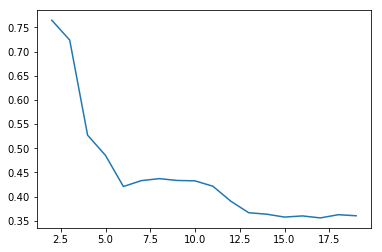

In [73]:

N_small = 1000
image_array_sample = shuffle(image_array, random_state=0)[:N_small]

ns = np.arange (2, 20, 1)
ss = []
for n in ns:
    km = cluster.KMeans(n_clusters=n)
    km.fit(image_array_sample)

    labels = km.labels_
    ss.append (metrics.silhouette_score(image_array_sample, labels))
    print "n = ", n, ", silhouette = ", ss[-1]
    
pl.plot ()
pl.plot (ns, ss)
pl.show()